Geração e classificação de dados aleatórios com distribuição gaussiana:
=======================================================================

Objetivos:

*   Gerar dados de duas dimensões rotulados em classes para treinamento do Perceptron;
*   Implementar um algoritmo para misturar os dados gerados;
*   Utilizar as funções criadas para treinar o Perceptron utilizando a Regra Delta.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle


## Declaração de funções

In [ ]:
#função de ativação
def degree(u):
    return np.where(u < 0, 0, 1)

#implementação do perceptron
def yperceptron(w,b,x, activation_function = degree):
    u = np.dot(w,x) + b                                                           #implementa a multiplicação de todos os valores de w e x
    y = activation_function(u)
    return y[0,:]


In [ ]:
def treina_perceptron(W, b, X, yd, alfa, max_epoch, error_tolerance):
    n = np.size(X, 1)                                                             #numero de amostras de X
    SEQ = error_tolerance                                                         #SEQ = somatório dos erros quadraticos
    epoch = 1                                                                     #começa na época 1
    vec_SEQ = []

    while(epoch <= max_epoch and SEQ >= error_tolerance):
      SEQ = 0                                                                     #inicializa SEQ da época
      for i in range(n):                                                          #para cada amostra de X
        y_i = yperceptron(W, b, X[:, i])                                          #determinar a saida do neuronio para a amostra i
        error_i = yd[i] - y_i                                                     #determinar o erro
        W = W + alfa * error_i * X[:, i].T                                         #atualiza o vetor de pesos
        b = b + alfa * error_i                                                     #atualiza o bias
        SEQ = SEQ + error_i ** 2                                                   #acumula o SEQ
      vec_SEQ.append(SEQ.item())                                                   #salva SEQ da epoca  - Essa alteração (.item()) garante que o valor de SEQ seja adicionado à lista como um escalar, eliminando as dimensões extras.
      epoch = epoch + 1

    return (W, b, vec_SEQ)


In [ ]:
def plot_SEQ(vec_SEQ):
    plt.figure()
    plt.plot(range(1, len(vec_SEQ) + 1), vec_SEQ, marker='o')
    plt.title('Soma dos Erros Quadráticos (SEQ) por Época')
    plt.xlabel('Épocas')
    plt.ylabel('SEQ')
    plt.grid(True)
    plt.show()


In [ ]:
def plotadc2d(x, y):                                                            #plota os pontos, recebe x (x1,x2) e y (classificação)
    plt.scatter(x[0, :], x[1, :], marker="o", c=y, s=20)                        #passando y para color gera diferentes cores para cada classe
    plt.xlabel('x1')
    plt.ylabel('x2')

def plotareta(w, b, intervalo):                                                 #plota a reta, recebe w (pesos), b (bias) e o intervalo (min, max) para gerar a reta
    x1 = np.linspace(intervalo[0], intervalo[1], 10)                            #gera 10 pontos igualmente espaçados entre intervalo[0] e intervalo[1]
    x2 = -(w[0, 0] * x1 + b) / w[0, 1]                                          #calcula os valores de x2 para cada valor de x1
    plt.plot(x1.T, x2.T, '-')

def plotagrafico():                                                             #mostra o grafico
    plt.legend()
    plt.show()


In [ ]:
def geragauss(nc, npc, mc, varc):
    '''
    Gera dados de duas dimensões, aleatórios, com distribuição gaussiana, e a correspondente classificação para cada amostra.

    Entradas: nc,npc,mc,varc
    Retorno: X,yd

    Onde:
    nc = tipo escalar que identifica o número total de classes dos dados
    npc = vetor linha com quantidade de amostras para cada classe de dados
    mc = matriz (2 x nc) com o valor médio de cada dimensão para cada classe
    varc = matriz (2 x nc) com a variância de cada dimensão para cada classe
    X = matriz (2 x N) com as amostras (por coluna) de todas as classes
        X = [
                x11 x12 x13 x14 ... x1N
                x21 x22 x23 x24 ... x2N
            ]
    N = total do número de amostras
    yd = vetor linha (1 x N) com a classificação das amostras de X, valores entre 0 e (nc-1). O valor da classe começa em zero.
        yd = [yd1 yd2 yd3 yd4 ... ydnpt ] onde: 0 ≤ ydi < (nc-1)

    '''

    X, yd = make_blobs(
        n_samples= npc,
        n_features = nc,
        centers = mc,
        cluster_std = varc,
        shuffle = False
    )

    X = X.T             #transpoe a matriz para manter o formato de amostra por coluna

    return (X, yd)

In [ ]:
def mistura(X, yd):
    '''
    Mistura os dados da matriz X e tambem a classificacao correspondentemente de cada amostra no vetor yd.

    Entradas: X,yd
    Retorno: xp,yp

    Onde:
    X = matriz (2 x N) com as amostras (por coluna) de todas as classes
    yd = vetor linha (1 x N) com a classificação numérica dos dados
    xp = matriz (2 x N) com as amostras (por coluna) de todas as classes misturadas
    yp = vetor linha (1 x N) com a classificação numérica dos dados misturada
    N = número total de amostras (soma de todas as classes)

    '''
    X = X.T                   #transpoe a matriz para voltar ao formato amostra por linha antes do embaralhamento
    xp, yp = shuffle(X, yd)
    xp = xp.T                 #transpoe a matriz para manter o formato de amostra por coluna

    return (xp, yp)

## Rodando experimento

### Classes Linearmente **separáveis**

In [ ]:
#Classes linearmente separaveis

X, yd = geragauss(
    nc = 2,
    npc = [50,50],
    mc = [[10,17], [17,10]],
    varc = [[2,2],[2,2]]
)

X, yd = mistura(X, yd)

In [ ]:
print('X: \n', X)
print('Y: \n', yd)

X: 
 [[11.99558394 18.82320722 10.91168473 17.77674719 15.42732495 19.88797884
  20.50313247  8.61936762 14.96659522  5.1958963   8.31270623 16.14109057
   9.86034943 11.46896544 12.33636525 14.61499968 17.22567554 18.37241642
  14.60885464  8.18779291 14.91648057 10.17518565 18.13013065 20.99369679
  12.28584668  9.40382241 18.49608897 13.47650229 17.44819389 16.57619895
  11.14981282 10.69810565 18.55323189 15.72034522  9.71504618 13.28361661
  16.44808268 11.89149355 17.08076931  8.05997112 16.54520363 13.26165931
   9.28833997 12.18397763 16.21110302 14.00528112 20.60095678 18.61473712
   7.76693845 12.91164111 15.56194487 10.97996049 16.21438083  9.75329067
  10.54320349 16.81742566 16.16436568 17.70084809  6.69892449 15.59761724
  16.52909769 18.93189288  9.69364069 19.50267305 10.61503342  9.422278
  12.13346271 14.67192868 20.70139838 10.88186994 10.48347903 10.1495181
  15.49523161  8.31457215 10.22141204 10.13547283 17.44254964 11.0410852
  19.98826108 11.73617332 13.96265204

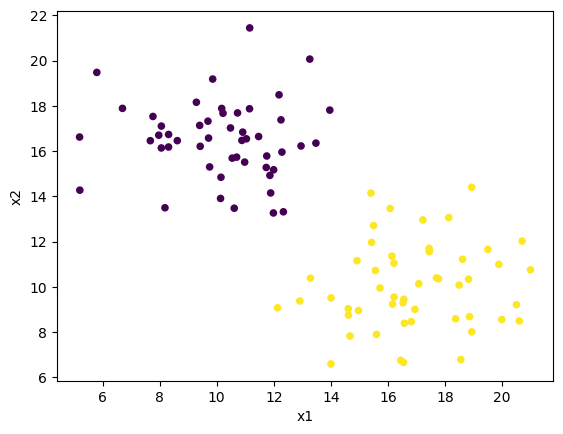

In [ ]:
plotadc2d(X, yd)
plt.show()

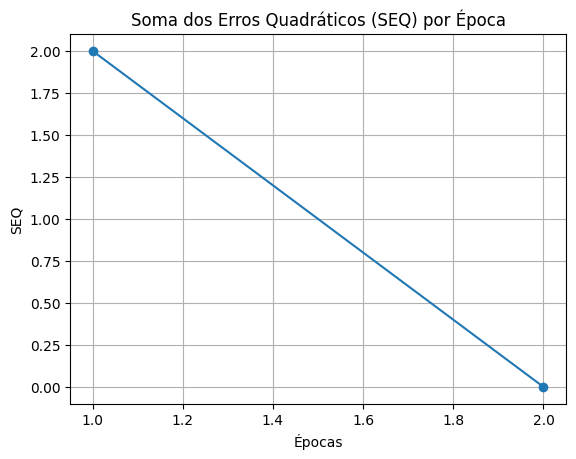

X: 
 [[11.99558394 18.82320722 10.91168473 17.77674719 15.42732495 19.88797884
  20.50313247  8.61936762 14.96659522  5.1958963   8.31270623 16.14109057
   9.86034943 11.46896544 12.33636525 14.61499968 17.22567554 18.37241642
  14.60885464  8.18779291 14.91648057 10.17518565 18.13013065 20.99369679
  12.28584668  9.40382241 18.49608897 13.47650229 17.44819389 16.57619895
  11.14981282 10.69810565 18.55323189 15.72034522  9.71504618 13.28361661
  16.44808268 11.89149355 17.08076931  8.05997112 16.54520363 13.26165931
   9.28833997 12.18397763 16.21110302 14.00528112 20.60095678 18.61473712
   7.76693845 12.91164111 15.56194487 10.97996049 16.21438083  9.75329067
  10.54320349 16.81742566 16.16436568 17.70084809  6.69892449 15.59761724
  16.52909769 18.93189288  9.69364069 19.50267305 10.61503342  9.422278
  12.13346271 14.67192868 20.70139838 10.88186994 10.48347903 10.1495181
  15.49523161  8.31457215 10.22141204 10.13547283 17.44254964 11.0410852
  19.98826108 11.73617332 13.96265204

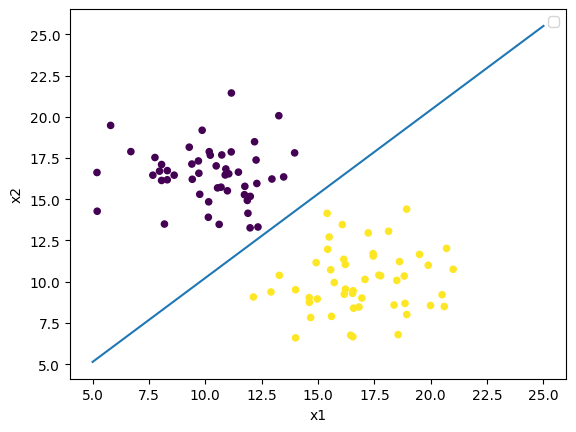

In [ ]:
#inicializa pesos w e bias
w = np.array(np.random.rand(1,np.size(X, 0))) * 2 -1
b = np.array(np.random.rand(1,1)) * 2 - 1

alfa = 1.2
max_epocas = 100
tolerancia = 0.001

w, b, vetor_seq = treina_perceptron(w,b,X,yd,alfa, max_epocas, tolerancia)

y = yperceptron(w,b,X, degree)
plot_SEQ(vetor_seq)
print("X: \n", X)
print("Y: \n", y)

plotadc2d(X, y)
plotareta(w, b, [5, 25])
plotagrafico()

In [ ]:
#gets the number of samples classified as 0 and as 1
n0 = np.sum(y == 0)
n1 = np.sum(y == 1)
print("Number of samples classified as 0: ", n0)
print("Number of samples classified as 1: ", n1)

Number of samples classified as 0:  50
Number of samples classified as 1:  50


### Classes linearmente **não separáveis**

In [ ]:
#Classes linearmente nao separaveis

X, yd = geragauss(
    nc = 2,
    npc = [50,50],
    mc = [[10,18], [18,10]],
    varc = [[2.5,4],[4,2.5]]
)

X, yd = mistura(X, yd)

In [ ]:
print('X: \n', X)
print('Y: \n', yd)

X: 
 [[ 5.59308406  9.71747613 24.30698171  9.1540415  10.04407364 22.62389742
   7.36920126  8.46804101 18.71415089 12.11937353  9.79736646 10.15971405
   6.23250822  8.97511512 11.52394442 23.33324122 13.94699982 13.13871972
  10.14511632 10.00685143 10.95975058  5.99418406 14.59138808  7.40497335
  13.80223675 14.41567142 11.83163723 12.03497993 14.84253476 10.21174474
  21.83880691 20.8258781  11.76604299  9.49048446 17.05757621  9.81413252
   7.99098148 16.05809468 21.88644224  5.62817316 14.91283934  7.15809653
  10.46480183 16.98827412 17.31653983 24.32928761 16.22173435 11.20084286
  12.97917211  8.90711864  5.17020828 20.25138026 20.1391213  15.81652553
  19.97896149 12.09927048 25.04138218 13.50187688 11.84594226 24.55085547
  24.01730472  9.33661828 15.01726468  7.06214394 25.64691553 22.98030069
  14.65807895 19.42441122 10.54922534 10.70842065 21.88256575 18.91728645
   8.51973861 22.6798204   3.69792508 23.11492689 14.22791513 11.028068
  12.5467187  19.49498209 16.418083

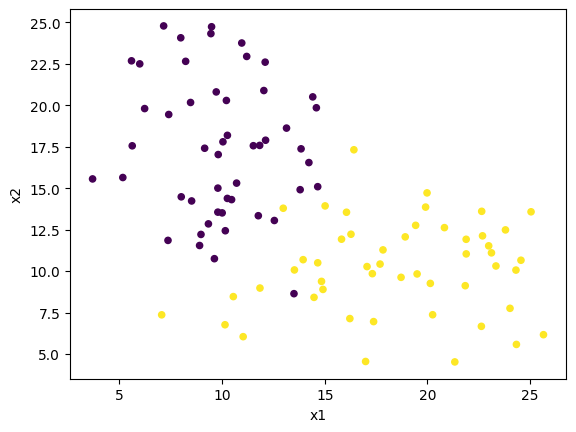

In [ ]:
plotadc2d(X, yd)
plt.show()

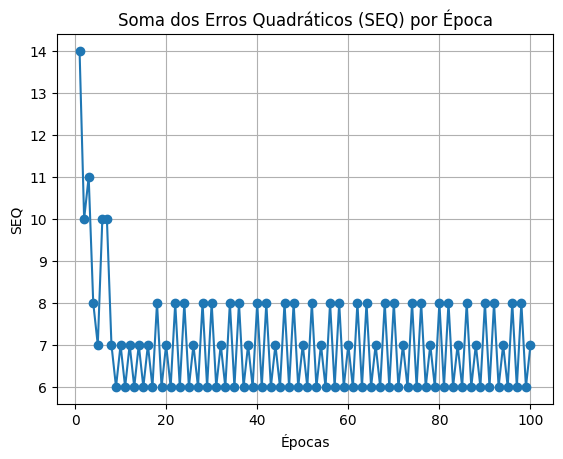

X: 
 [[ 5.59308406  9.71747613 24.30698171  9.1540415  10.04407364 22.62389742
   7.36920126  8.46804101 18.71415089 12.11937353  9.79736646 10.15971405
   6.23250822  8.97511512 11.52394442 23.33324122 13.94699982 13.13871972
  10.14511632 10.00685143 10.95975058  5.99418406 14.59138808  7.40497335
  13.80223675 14.41567142 11.83163723 12.03497993 14.84253476 10.21174474
  21.83880691 20.8258781  11.76604299  9.49048446 17.05757621  9.81413252
   7.99098148 16.05809468 21.88644224  5.62817316 14.91283934  7.15809653
  10.46480183 16.98827412 17.31653983 24.32928761 16.22173435 11.20084286
  12.97917211  8.90711864  5.17020828 20.25138026 20.1391213  15.81652553
  19.97896149 12.09927048 25.04138218 13.50187688 11.84594226 24.55085547
  24.01730472  9.33661828 15.01726468  7.06214394 25.64691553 22.98030069
  14.65807895 19.42441122 10.54922534 10.70842065 21.88256575 18.91728645
   8.51973861 22.6798204   3.69792508 23.11492689 14.22791513 11.028068
  12.5467187  19.49498209 16.418083

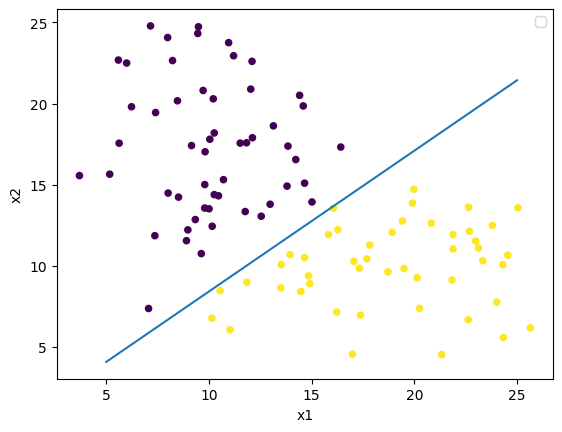

In [ ]:
#inicializa pesos w e bias
w = np.array(np.random.rand(1,np.size(X, 0))) * 2 -1
b = np.array(np.random.rand(1,1)) * 2 - 1

alfa = 1.2
max_epocas = 100
tolerancia = 0.001

w, b, vetor_seq = treina_perceptron(w,b,X,yd,alfa, max_epocas, tolerancia)

y = yperceptron(w,b,X, degree)
plot_SEQ(vetor_seq)
print("X: \n", X)
print("Y: \n", y)

plotadc2d(X, y)
plotareta(w, b, [5, 25])
plotagrafico()

In [ ]:
#gets the number of samples classified as 0 and as 1
n0 = np.sum(y == 0)
n1 = np.sum(y == 1)
print("Number of samples classified as 0: ", n0)
print("Number of samples classified as 1: ", n1)

Number of samples classified as 0:  53
Number of samples classified as 1:  47


# ----------------------------------------------------------

# Codigo anterior (Só rodar se for para teste)

In [ ]:
#declara x
x = np.array([[0, 1, 0, 1], [0, 0, 1, 1]])
print('x: \n', x)


In [ ]:
#AND
print('Resultados AND')
#inicializa pesos w e bias
w = np.array(np.random.rand(1,np.size(x, 0))) * 2 -1
b = np.array(np.random.rand(1,1)) * 2 - 1

alfa = 1.2
max_epocas = 10
tolerancia = 0.001
yd = [0, 0, 0, 1]                               #y esperado

w, b, vetor_seq = treina_perceptron(w,b,x,yd,alfa, max_epocas, tolerancia)

y = yperceptron(w,b,x, degree)
plot_SEQ(vetor_seq)
print("X: \n", x)
print("Y: \n", y)

plotadc2d(x, y)
plotareta(w, b, [-0.2, 1.2])
plt.show()


In [ ]:
#OR

#inicializa pesos w e bias
w = np.array(np.random.rand(1,np.size(x, 0))) * 2 -1
b = np.array(np.random.rand(1,1)) * 2 - 1

alfa = 1.2
max_epocas = 10
tolerancia = 0.001
yd = [0, 1, 1, 1]                               #y esperado

w, b, vetor_seq = treina_perceptron(w,b,x,yd,alfa, max_epocas, tolerancia)

y = yperceptron(w,b,x, degree)
plot_SEQ(vetor_seq)
print("X: \n", x)
print("Y: \n", y)

plotadc2d(x, y)
plotareta(w, b, [-0.2, 1.2])
plt.show()
